# **Linear Algebra for Data Science**: HW3, task 3  
# *Iterative solutions of the linear systems* (3 pts)

### <div align="right"> &copy; Volodymyr Kuchynskyi & Rostyslav Hryniv, 2023 </div>

## Completed by:   
*   Roman Kovalchuk
*   Eduard Pekach

The aim of this task is to discuss three classic iterative methods of solving linear systems $A\mathbf{x} = \mathbf{b}$, namely, the Jacobi, Gauss-Seidel, and successive over-relaxation (SOR) methods. We will implement them, analyse their convergence, and compare convergence rate with the spectral radius of the corresponding matrix $B$ in the iteration scheme $\mathbf{x}_{k+1} = B\mathbf{x}_k + \mathbf{d}$

In [1]:
import numpy as np
#Note: other common plotting libraries (such as plotly, altair, etc) or other modules of matplotlib are allowed, if you prefer them. Simply replace the next import with your library of choice
import matplotlib.pyplot as plt

# The methods

A general method to turn a linear system into an iterative one proceeds as follows. We write $A = M - N$ with an invertible $M$ and recast $A\mathbf{x} = \mathbf{b}$ as the iteration scheme
$$M\mathbf{x}_{k+1} = N\mathbf{x}_k + \mathbf{b}, \qquad \text{or} \qquad \mathbf{x}_{k+1} = (M^{-1}N)\mathbf{x}_k + M^{-1}\mathbf{b}$$

All three methods of interest are formulated in terms of the lower-triangular, diagonal, and upper-triangular parts $L$, $D$, and $U$ of $A$, respectively.



## Jacobi method
Take $M=D$; then with $B_J:=- D^{-1}(L+U)$ and $\mathbf{d}_J:=D^{-1} \mathbf{b}$ the iterations are
$$
  \mathbf{x}_{k+1} = B_J \mathbf{x}_k + \mathbf{d}_J
$$
or
$$
  x_j^{(k+1)} = a_{jj}^{-1}\bigl( b_j -  \sum_{l\ne j} a_{jl} x^{(k)}_l \bigr)
$$
The method is known to converge if $A$ is <font color='red'>*diagonally dominating*</font>, i.e., if $|a_{jj}|> \sum_{i\ne j}|a_{ji}|$ for all $j=1,2,\dots, n$.



## Gauss-Seidel method
Take $M=U+D$; then with $B_{GS}:=- (L+D)^{-1}U$ and $\mathbf{d}_{GS}:= (U+D)^{-1} \mathbf{b}$ the iterations are
$$
  \mathbf{x}_{k+1} = B_{GS} \mathbf{x}_k + \mathbf{d}_{GS}
$$
or
$$
  x_j^{(k+1)} = a_{jj}^{-1}\bigl(b_j - \sum_{l< j} a_{jl} x^{\color{red}{(k+1)}}_l  - \sum_{l > j} a_{jl} x^{(k)}_l\bigr)
$$
The method is known to converge if $A$ is <font color='red'>*positive definite*</font>



## Successive over-relaxation method (SOR)
SOR depends on a parameter $\omega \in (0,2)$ and starts with re-writing  $\omega A$ as $\omega A = (D + \omega L) - ((1-\omega)D - \omega U)$, so that $A\mathbf{x} = \mathbf{b}$ is converted into
$$ (D + \omega L) \mathbf{x}  = \bigl((1-\omega)D - \omega U\bigr)\mathbf{x} + \omega\mathbf{b}$$
and becomes the iteration scheme  
$$
  \mathbf{x}_{k+1} = B_{SOR} \mathbf{x}_k + \mathbf{d}_{SOR}
$$
with $B_{SOR} = (D+\omega L)^{-1}((1-\omega) D - \omega U)$ and $\mathbf{d}_{SOR} = \omega(D + \omega L)^{-1}\mathbf{b}$, or   

$$
  x_j^{(k+1)} = \frac\omega{a_{jj}} \Bigl(b_j - \sum_{l< j} a_{jl}x_l^{\color{red}{{(k+1)}}} - \sum_{l> j} a_{jl} x_l^{(k)} \Bigr)+ (1-\omega)x_j^{(k)}
$$
The method is known to converge if $A$ is <font color='red'>*positive definite*</font>; $\omega=1$ coincides with the Gauss-Seidel method but other $\omega\in (0,2)$ can significantly improve the convergence rate.

# Implementation **(1 pt)**

By default, the iterations start with $\mathbf{x}_0:=\mathbf{0}$; they stop when relative increment $\|\mathbf{x}_{k+1} - \mathbf{x}_{k}\|/(\|\mathbf{x}_{k+1}\| + \|\mathbf{x}_{k}\|)$ does not exceed a given threshold $\varepsilon$ or the number of iteration exceeds some $N$. We can take the default values $\varepsilon = 10^{-4}$ and $N=10^4$

## Jacobi method

In [32]:
## implement the function
def jacobi(A, b, N=1000, x=None):
    """Solve the system iteratively using the Jacobi method

    Args:
      A (np.array): a 2D array for coefficient matrix of the system of equations
      b (np.array): a 1D array for the solution vector

    Returns:
      (x, incs) (Tuple(np.array, np.array)): a tuple containing the solution x (if the method converges) and the list of increments ||x_{k+1} - x_k|| for further analysis
    """
    if x is None:
        x = np.zeros(len(A[0]))

    # Create a vector of the diagonal elements of A
    # and subtract them from A
    D = np.diag(A)
    R = A - np.diagflat(D)
    increments = []

    # Iterate for N times
    for i in range(N):
        x_new = np.divide((np.subtract(b, np.dot(R,x))), D)

        increment = np.linalg.norm(x_new - x)
        increments.append(increment)
        if increment < 1e-4:
            return x_new, increments

        x = x_new

    print("jacobi: Convergence not achieved")
    return x, increments


## Gauss-Seidel method

In [82]:
## implement the function
def gs(A, b, N=25):
    """Solve the system iteratively using the Gauss-Seidel method

    Args:
      A (np.array): a 2D array for coefficient matrix of the system of equations
      b (np.array): a 1D array for the solution vector

    Returns:
      (x, incs) (Tuple(np.array, np.array)): a tuple containing the solution x (if the method converges) and the list of increments ||x_{k+1} - x_k|| for further analysis
    """
    n = A.shape[0]
    x = np.zeros_like(b, dtype=np.float64)
    increments = []
    
    D = np.diag(np.diag(A))
    L = np.tril(A, k=-1)
    U = np.triu(A, k=1)
    
    D_L_inv = np.linalg.inv(D + L)
    B_GS = -np.dot(D_L_inv, U)
    d_GS = np.dot(D_L_inv, b)
    
    for iteration in range(N):
        x_new = np.dot(B_GS, x) + d_GS
        
        increment = np.linalg.norm(x_new - x)
        increments.append(increment)
        if increment < 1e-4:
            return x_new, increments

        x = x_new
    print("GS: Convergence not achieved")    
    return x, increments

## 2.3 Successive over-relaxation method

In [20]:
## implement the function
def sor(A, b, w, N):
    """Solve the system iteratively using the Gauss-Seidel method

    Args:
      A (np.array): a 2D array for coefficient matrix of the system of equations
      b (np.array): a 1D array for the solution vector
      w : the \omega parameter for the SOR method. See the explanation in markdown cell above

    Returns:
      (x, incs) (Tuple(np.array, np.array)): a tuple containing the solution x (if the method converges) and the list of increments ||x_{k+1} - x_k|| for further analysis
    """
    n = A.shape[0]
    x = np.zeros_like(b, dtype=np.float64)
    increments = []

    for iteration in range(N):
        x_new = np.copy(x)
        for j in range(n):
            sum1 = np.dot(A[j, :j], x_new[:j])
            sum2 = np.dot(A[j, j + 1:], x[j + 1:])
            x_new[j] = (b[j] - sum1 - sum2) / A[j, j]
            x_new[j] = w * x_new[j] + (1 - w) * x[j]

        increment = np.linalg.norm(x_new - x)
        increments.append(increment)
        if increment < 1e-4:
            return x_new, increments

        x = x_new

    print("SOR: Convergence not achieved")
    return x, increments


# Testing convergence **(0.5 pts)**

Generate random column vectors $\mathbf{b}, \mathbf{v}\in \mathbb{R}^{100}$ with independent and uniformly distributed entries in $(0,1)$ and set $A = \mathbf{v}\mathbf{v}^\top$

In [87]:
n= 100
b = np.random.uniform(0, 1, n)
v = np.random.uniform(0, 1, n)
A = np.outer(v, v)

## Convergence

Discuss which of the three iteration schemes for $A\mathbf{x} = \mathbf{b}$ will probably converge and which not. Quote the corresponding results

---
It's most probable that neither of methods will converge due to the huge variety of possible solutions and the dimensionality of matrix with a low number of iterations (<25).
However, its worth noting that the Jacobi iterative method would most probably of all other not converge with smaller number of iterations or a larger one.
That is caused by the fact, that the Jacobi iterative method is prone to exploding and to numerical overflow in division part.
Which is not a problem for other methods here, as both Successive over-relaxation (SOR) and Gauss - Seidel requires both less iterations, and won't explode indulging numerical instability.
Which in fact converged from 1k-12k iterations (depends on method and parameters) to 1e-4 error, without exploding, keeping numerical stability.

Worth noting, that SOR achieves same results as GS and Gauss with only 10 iterations, when for others it takes around 25. However, take into account size of matrix used, and numerical instability Jacobi has.

The Jacobi method would most probably require a lot more iterations provoking numerical instability when the x is very close to real values. So it's preferred to choose increment threshold wisely.

---

## Testing
Run these iterations to confirm your predictions

In [88]:
A

array([[0.90771096, 0.26870173, 0.48173752, ..., 0.68635055, 0.39785796,
        0.37389108],
       [0.26870173, 0.07954142, 0.14260454, ..., 0.20317434, 0.11777441,
        0.1106797 ],
       [0.48173752, 0.14260454, 0.25566623, ..., 0.36425782, 0.21114993,
        0.19843031],
       ...,
       [0.68635055, 0.20317434, 0.36425782, ..., 0.51897255, 0.30083368,
        0.28271152],
       [0.39785796, 0.11777441, 0.21114993, ..., 0.30083368, 0.17438476,
        0.16387986],
       [0.37389108, 0.1106797 , 0.19843031, ..., 0.28271152, 0.16387986,
        0.15400777]])

In [89]:
x_jacobi, increments_j = jacobi(A, b, N=25)
x_gs, increments_gs = gs(A, b, N=25)
x_sor, increments_sor = sor(A, b, 1.25, N=10)

jacobi: Convergence not achieved
GS: Convergence not achieved
SOR: Convergence not achieved


[2.04042599e+48 6.89283630e+48 3.84466009e+48 7.54492800e+48
 5.35936450e+48 1.97291092e+48 5.25144308e+48 1.45515476e+49
 3.13202368e+48 2.21767857e+48 2.09064771e+48 2.15675549e+48
 4.21503871e+50 2.75735242e+48 2.03238099e+48 3.50019143e+48
 2.52354723e+48 4.97792862e+48 4.08022479e+49 4.31056495e+48
 2.26252090e+48 1.73340756e+49 3.53463555e+48 5.05907678e+48
 2.42634379e+48 3.67284124e+48 6.48537547e+49 2.62543051e+48
 9.99103876e+48 3.36262160e+48 9.07893303e+48 3.09085193e+48
 8.39760306e+48 2.32655546e+48 3.21583739e+48 2.53834258e+48
 2.46203826e+48 3.23231624e+48 3.73786945e+49 4.57041655e+49
 2.34322715e+48 3.25925784e+48 2.44400085e+48 2.16476783e+48
 3.93760538e+48 2.51008328e+48 3.42426490e+48 1.85271044e+49
 3.79322155e+48 1.28740519e+49 2.78875340e+48 2.46363833e+48
 2.01820243e+48 4.00578108e+49 2.76080266e+48 3.28418162e+48
 3.44895722e+48 2.16798820e+48 7.78214661e+49 2.06451934e+48
 2.39772163e+49 7.30227588e+48 3.16596254e+48 4.75547551e+48
 2.05728870e+48 1.953879

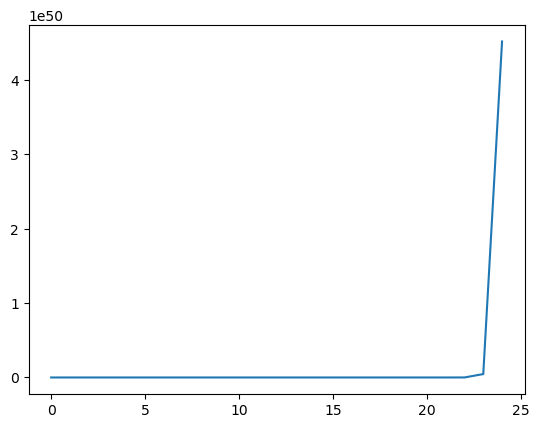

In [90]:
print(x_jacobi)
plt.plot(increments_j)

[ 1.15871559e+00  5.14289297e+01 -3.44437407e+01  2.20467116e+02
 -2.14570922e+01 -3.88059857e+01  1.09734543e+02 -1.23682999e+02
 -7.33637211e+00 -3.87575677e+01  1.31290124e+01 -8.14561775e+00
  9.51400786e+04 -5.95888053e+02 -9.30643461e+00 -6.00577984e+00
  1.20231696e+01  2.35173210e+01  2.01982111e+03 -2.34832339e+02
 -2.22545861e+01  3.64635676e+02 -3.59850923e+01  1.14945419e+01
 -2.39510036e+01  4.44548452e+01  1.98094468e+04 -8.09606464e+02
  4.49702738e+02 -1.64336986e+02  2.68637592e+01 -4.18952355e+01
  2.37490547e+01  1.39130805e+01  2.87049149e+01 -2.00539537e+01
 -1.33958912e+01  4.74571335e+01  8.76839143e+02  1.08485501e+04
 -6.22907168e+02  6.99357897e+00 -2.61908488e+01  7.01696740e+00
  2.98341111e+01 -2.10651600e+00 -3.83292273e+01  5.72548186e+02
 -1.05218008e+02  3.40021700e+02 -6.54775993e+01 -2.32440119e+01
  7.81718899e+00  5.77522398e+03 -3.70552257e+02 -2.56708689e+01
  2.92833291e+01 -9.32521985e+00  3.75248787e+04 -9.93781303e+02
  2.84019769e+03 -8.59693

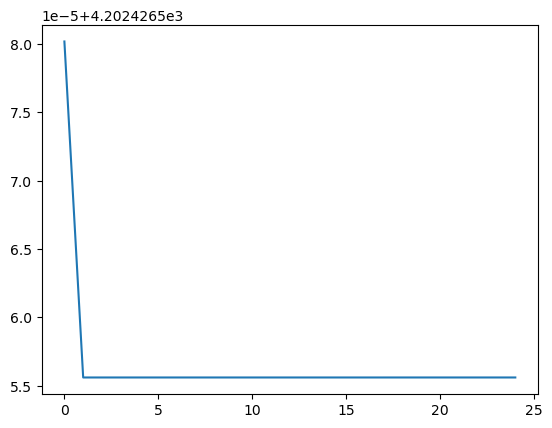

In [91]:
print(x_gs)
plt.plot(increments_gs)

[ 1.07240144e-01  2.56238969e+01 -2.07949704e+01  1.20435797e+02
 -3.21157393e+01 -1.64473489e+01  6.58120529e+01 -1.07432169e+02
  2.11264404e+00 -1.97527565e+01  1.12198309e+01 -6.96646138e+00
  4.79104105e+04 -3.76297925e+02  6.46869170e+01 -3.08540402e+01
  1.15728255e+01  6.05154532e+00  9.97509983e+02 -1.43761725e+02
  7.73705025e+00  1.67498680e+02 -2.65313169e+01  1.52407511e+01
 -1.38028758e+01  2.74508963e+01  9.78354381e+03 -5.03818372e+02
  7.04169796e+02 -1.41418002e+02  1.08887503e+02 -3.02150931e+01
  3.23975388e+01  4.71260620e+00  1.27239797e+01 -1.25378174e+01
 -3.65771509e+00  2.49290855e+01  3.66349220e+02  5.31228822e+03
 -3.79543099e+02  1.35475973e+02 -3.84925708e+01  1.20321590e+01
  9.44558036e+00 -2.55856332e+00 -1.82920133e+01  3.11016487e+02
 -6.85283081e+01  2.28156478e+02 -4.50945086e+01 -1.66266717e+00
  4.24910703e+00  2.86652764e+03 -2.34666728e+02  5.69529793e+01
 -3.10948580e-01 -4.61374495e+00  1.88038427e+04 -6.21602055e+02
  3.22491204e+03 -6.75383

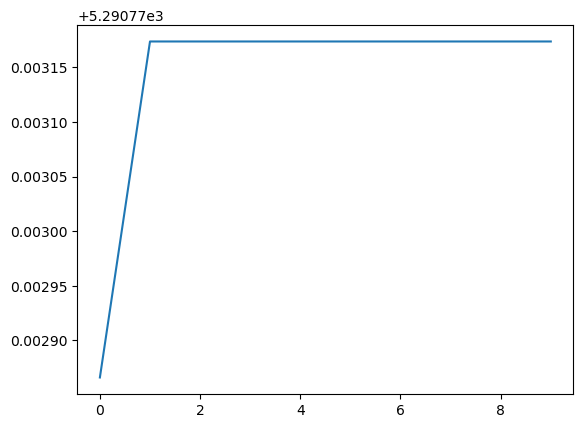

In [92]:
print(x_sor)
plt.plot(increments_sor)

# Convergence rates **(1 pt)**

Now change the matrix $A$ to $A=  \alpha I + \mathbf{v}\mathbf{v}^\top$ with a real $\alpha$.

In [94]:
def create_matrix(alpha, v):
  return alpha * np.identity(100) + v.dot(v.T)

## Convergence
For what $\alpha$ will each of the methods converge? Quote the corresponsing results guaranteeing convergence

---
If omega = 1, the SOR method becomes Gauss-Seidel method, if < 1 - method of simple iterations, > 1 and < 2 - SOR. With higher omega values the number of iterations should decrease.
Usually Values of $\omega > 1$ are used to speed up convergence of a slow-converging process, while values of $\omega < 1$ are often used to help establish convergence of a diverging
iterative process or speed up the convergence of an overshooting process.

In our specific example, we can see (on plots below) that the method is probably prone to overshooting, as we can see that with  $\omega  = .75$ method converged within 2500 iterations;
with $\omega  = 1.0$ method converged within 7500 iterations, and with $\omega  = 1.25$ method did not converge within 10k iterations.

---

## Testing convergence

Run the implemented methods to confirm your guess

In [95]:
# your code with alpha examples for each method
alpha_1 = 7
A_1 = create_matrix(alpha_1, v)
alpha_2 = 10
A_2 = create_matrix(alpha_2, v)
alpha_3 = 15
A_3 = create_matrix(alpha_3, v)

jacobi: Convergence not achieved
Jacobi Solution: [-2.35973666e+92 -2.35973666e+92 -2.35973666e+92 -2.35973666e+92
 -2.35973666e+92 -2.35973666e+92 -2.35973666e+92 -2.35973666e+92
 -2.35973666e+92 -2.35973666e+92 -2.35973666e+92 -2.35973666e+92
 -2.35973666e+92 -2.35973666e+92 -2.35973666e+92 -2.35973666e+92
 -2.35973666e+92 -2.35973666e+92 -2.35973666e+92 -2.35973666e+92
 -2.35973666e+92 -2.35973666e+92 -2.35973666e+92 -2.35973666e+92
 -2.35973666e+92 -2.35973666e+92 -2.35973666e+92 -2.35973666e+92
 -2.35973666e+92 -2.35973666e+92 -2.35973666e+92 -2.35973666e+92
 -2.35973666e+92 -2.35973666e+92 -2.35973666e+92 -2.35973666e+92
 -2.35973666e+92 -2.35973666e+92 -2.35973666e+92 -2.35973666e+92
 -2.35973666e+92 -2.35973666e+92 -2.35973666e+92 -2.35973666e+92
 -2.35973666e+92 -2.35973666e+92 -2.35973666e+92 -2.35973666e+92
 -2.35973666e+92 -2.35973666e+92 -2.35973666e+92 -2.35973666e+92
 -2.35973666e+92 -2.35973666e+92 -2.35973666e+92 -2.35973666e+92
 -2.35973666e+92 -2.35973666e+92 -2.3597

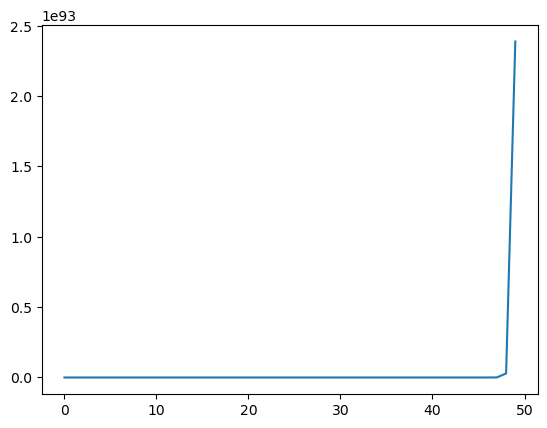

In [165]:
x_jacobi, increments_jacobi = jacobi(A_1, b, N=50)
print("Jacobi Solution:", x_jacobi)
plt.plot(increments_jacobi)

GS: Convergence not achieved
Gauss-Seidel Solution: [-0.00348356 -0.01197624 -0.02264458  0.05340074  0.0747753   0.05508981
  0.06362839 -0.04145759  0.0521009  -0.06691085 -0.00076666 -0.03773639
 -0.0668003   0.04073307  0.03688936 -0.01627663  0.04115003  0.00360057
 -0.0401713  -0.0133834  -0.047516   -0.03773565  0.0224312   0.01220644
 -0.00056644  0.05110161  0.0479557   0.05696562  0.05220326 -0.01598276
 -0.06147917 -0.09011163 -0.07687214  0.01585527  0.06273527  0.03219039
 -0.01595538  0.06498892 -0.04818738  0.05512091  0.05445507  0.02491692
 -0.03858542 -0.0032599  -0.00478158  0.04165718 -0.06513939 -0.05217294
 -0.04209222 -0.02203865  0.01397915 -0.05092003 -0.00156932  0.02346054
  0.06371336 -0.01025482  0.03506917  0.04546709  0.05734021  0.04355429
  0.01947917 -0.06664537 -0.03808747 -0.04299148 -0.06446298  0.01636527
 -0.02274138  0.05195315 -0.04570952 -0.02387684 -0.03156158  0.01968031
  0.07205082  0.00354292  0.05522823  0.02119063 -0.05134822 -0.02378124

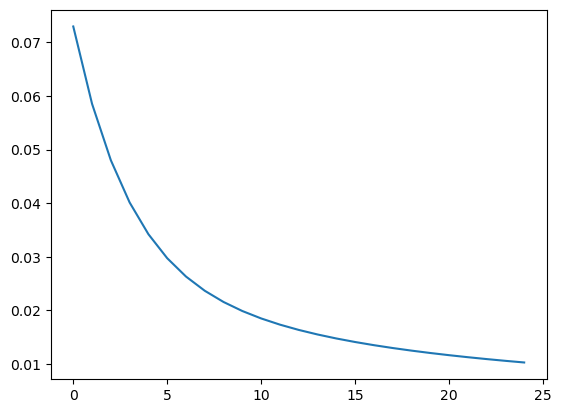

In [97]:
x_gs, increments_gs = gs(A_1, b)
print("Gauss-Seidel Solution:", x_gs)
plt.plot(increments_gs)

SOR Solution: [-0.0174504  -0.03562235 -0.05352776  0.01889273  0.04166432  0.02904375
  0.04921539 -0.04357608  0.05949989 -0.05467281  0.01155731 -0.02888391
 -0.06416787  0.03621683  0.0276275  -0.02627386  0.03372425  0.00034842
 -0.04006853 -0.01266165 -0.04962224 -0.04572918  0.00758794 -0.00758499
 -0.02206298  0.0311956   0.03282011  0.04966558  0.0552513  -0.00227463
 -0.04075171 -0.06979888 -0.06545552  0.01364219  0.04929217  0.0151358
 -0.02976458  0.05777329 -0.04918866  0.05845592  0.06179022  0.03785034
 -0.01948611  0.0199045   0.01919176  0.06497545 -0.04270659 -0.03217387
 -0.02773477 -0.01606014  0.01160272 -0.05982061 -0.01526572  0.00660787
  0.0467138  -0.02397645  0.02674521  0.04349243  0.06279589  0.05796708
  0.0436756  -0.0349133  -0.00438981 -0.01363493 -0.04421892  0.02605029
 -0.02187298  0.04805706 -0.05067294 -0.02899244 -0.03862124  0.00889086
  0.05897361 -0.00783432  0.04954016  0.02342684 -0.04227554 -0.012054
  0.03620842  0.06281178 -0.01323624  0.

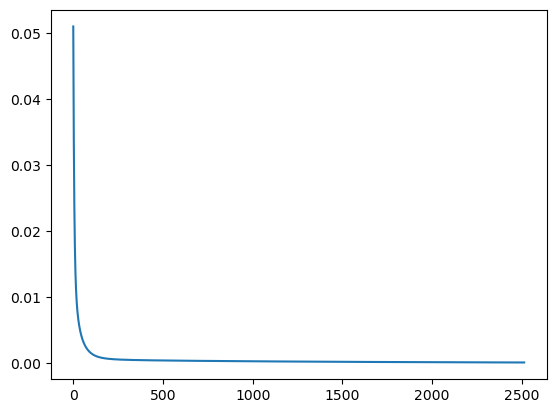

In [166]:
omega = 0.75
x_sor, increments_sor = sor(A_1, b, w=omega, N=10000)
print("SOR Solution:", x_sor)
plt.plot(increments_sor)

Gauss-Seidel Solution: [-0.01043093 -0.02315438 -0.03569811  0.01497947  0.03089606  0.02203148
  0.03611491 -0.02888225  0.04322157 -0.03675473  0.00954514 -0.01883052
 -0.04360141  0.02659073  0.02049632 -0.01732091  0.02458741  0.00113028
 -0.02725898 -0.0081745  -0.03414981 -0.0315297   0.00568551 -0.00504361
 -0.01528716  0.02188443  0.02291216  0.03459497  0.03839681 -0.00197824
 -0.0290174  -0.04945351 -0.04651374  0.00875698  0.03361759  0.00961741
 -0.02189955  0.03929463 -0.03565638  0.03962216  0.04188878  0.02506901
 -0.01512259  0.01240074  0.01185792  0.04386896 -0.03153951 -0.02419103
 -0.02110136 -0.01294005  0.00641985 -0.04357375 -0.01237577  0.00295207
  0.03104928 -0.01840422  0.01713712  0.02890273  0.04246388  0.03913846
  0.02919495 -0.0257512  -0.00431339 -0.01070859 -0.0320363   0.01723764
 -0.01621911  0.03282517 -0.03618923 -0.02091331 -0.02755133  0.00581147
  0.04097549 -0.0056826   0.03458793  0.01641752 -0.02946514 -0.0082014
  0.0256902   0.04441926 -0.0

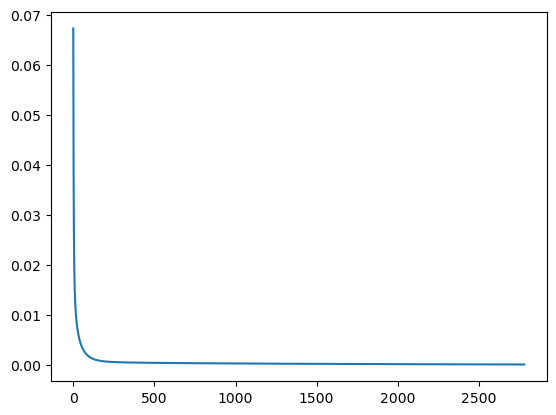

In [177]:
x_gs, increments_gs = gs(A_2, b, N=4000)
print("Gauss-Seidel Solution:", x_gs)
plt.plot(increments_gs)

SOR Solution: [-0.0116832  -0.02446711 -0.03706611  0.01356159  0.02943389  0.02053078
  0.03458157 -0.03044218  0.04164116 -0.03834939  0.00794247 -0.0204349
 -0.04520122  0.02500176  0.0189244  -0.01886962  0.02306797 -0.00035395
 -0.0287022  -0.00957108 -0.0354943  -0.03281685  0.00446072 -0.00620126
 -0.01637316  0.02087432  0.02198187  0.03374814  0.03763674 -0.0026486
 -0.02959542 -0.04993695 -0.0469007   0.00846801  0.03342775  0.00952744
 -0.02188929  0.03940509 -0.03544614  0.03993137  0.04229577  0.0255722
 -0.01452515  0.01309012  0.01263656  0.04473382 -0.03059179 -0.02316413
 -0.01999929 -0.01176711  0.00765909 -0.04227305 -0.01101869  0.00436022
  0.03250299 -0.01691064  0.01866471  0.03045834  0.04404142  0.04073173
  0.03079769 -0.02414529 -0.00271062 -0.00911528 -0.03045871  0.01879328
 -0.01469154  0.03431864 -0.03473575 -0.01950556 -0.02619487  0.00711129
  0.04221353 -0.00451124  0.03568799  0.01744193 -0.02852044 -0.00734012
  0.02646463  0.0451038  -0.00811729  0.

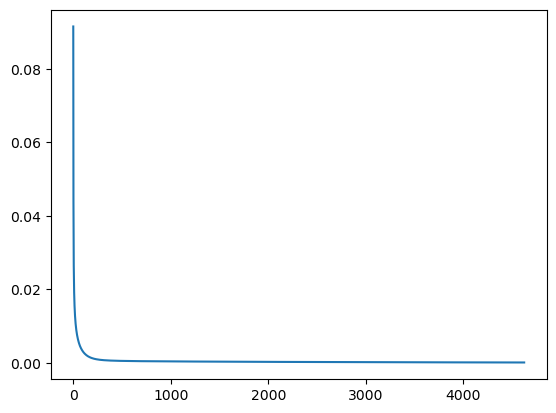

In [173]:
omega = 1.25
x_sor, increments_sor = sor(A_2, b, omega, N=10000)
print("SOR Solution:", x_sor)
plt.plot(increments_sor)

jacobi: Convergence not achieved
Jacobi Solution: [-4.84040184e+14 -4.84040184e+14 -4.84040184e+14 -4.84040184e+14
 -4.84040184e+14 -4.84040184e+14 -4.84040184e+14 -4.84040184e+14
 -4.84040184e+14 -4.84040184e+14 -4.84040184e+14 -4.84040184e+14
 -4.84040184e+14 -4.84040184e+14 -4.84040184e+14 -4.84040184e+14
 -4.84040184e+14 -4.84040184e+14 -4.84040184e+14 -4.84040184e+14
 -4.84040184e+14 -4.84040184e+14 -4.84040184e+14 -4.84040184e+14
 -4.84040184e+14 -4.84040184e+14 -4.84040184e+14 -4.84040184e+14
 -4.84040184e+14 -4.84040184e+14 -4.84040184e+14 -4.84040184e+14
 -4.84040184e+14 -4.84040184e+14 -4.84040184e+14 -4.84040184e+14
 -4.84040184e+14 -4.84040184e+14 -4.84040184e+14 -4.84040184e+14
 -4.84040184e+14 -4.84040184e+14 -4.84040184e+14 -4.84040184e+14
 -4.84040184e+14 -4.84040184e+14 -4.84040184e+14 -4.84040184e+14
 -4.84040184e+14 -4.84040184e+14 -4.84040184e+14 -4.84040184e+14
 -4.84040184e+14 -4.84040184e+14 -4.84040184e+14 -4.84040184e+14
 -4.84040184e+14 -4.84040184e+14 -4.8404

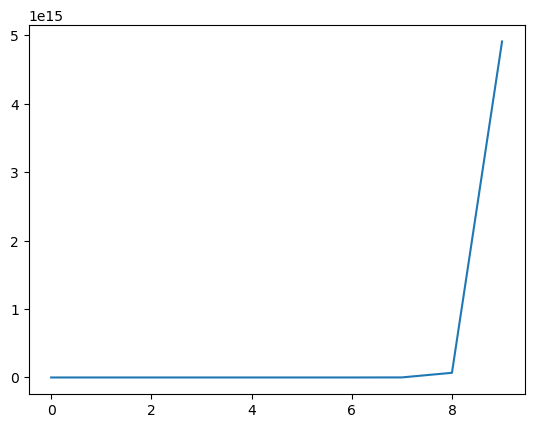

In [115]:
x_jacobi, increments_jacobi = jacobi(A_3, b, N=10)
print("Jacobi Solution:", x_jacobi)
plt.plot(increments_jacobi)

GS: Convergence not achieved
Gauss-Seidel Solution: [-0.00752533 -0.01575152 -0.02309817  0.01241906  0.0252369   0.02160608
  0.03286395 -0.0094475   0.03852917 -0.01599412  0.01281752 -0.00855898
 -0.02743608  0.01752581  0.01242292 -0.01300582  0.01534807  0.00043279
 -0.01779304 -0.00460861 -0.02173994 -0.01994862  0.00499573 -0.00172393
 -0.00773517  0.01816995  0.02006764  0.02886238  0.0318949   0.00473011
 -0.01438362 -0.02980613 -0.02997482  0.00496961  0.02040121  0.00430094
 -0.01586207  0.02632514 -0.02222703  0.02897598  0.03088648  0.01941267
 -0.00824368  0.00875632  0.00672589  0.02628669 -0.02566906 -0.02218322
 -0.02112222 -0.01613309 -0.00302383 -0.03545877 -0.01313958 -0.00093519
  0.02001424 -0.0107828   0.01475351  0.0238697   0.03345273  0.03096931
  0.02325389 -0.01522045 -0.00335297 -0.01030171 -0.0270314   0.00392984
 -0.01931101  0.01350042 -0.03149514 -0.01972188 -0.02232888  0.00171625
  0.02682831 -0.00280577  0.02522092  0.01384701 -0.01658928 -0.00289566

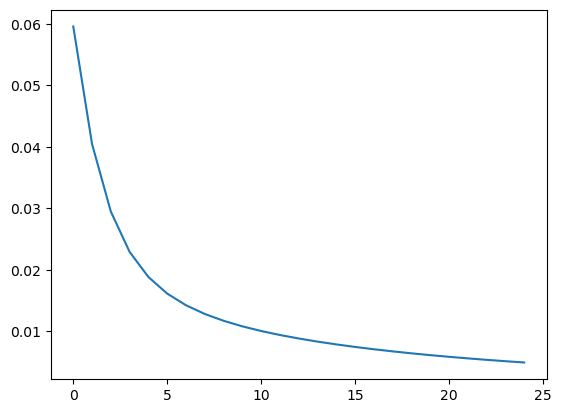

In [116]:
x_gs, increments_gs = gs(A_3, b, N=25)
print("Gauss-Seidel Solution:", x_gs)
plt.plot(increments_gs)

SOR Solution: [-7.39436461e-03 -1.59207982e-02 -2.43253127e-02  9.41997992e-03
  1.99937019e-02  1.40492088e-02  2.34060824e-02 -1.99546073e-02
  2.80882892e-02 -2.52525187e-02  5.59390334e-03 -1.33401547e-02
 -2.98677704e-02  1.69166153e-02  1.28466470e-02 -1.23684893e-02
  1.55701343e-02 -6.48332758e-05 -1.89845104e-02 -6.25169274e-03
 -2.35554337e-02 -2.17923164e-02  3.03738312e-03 -4.09270848e-03
 -1.08960723e-02  1.39135676e-02  1.46300981e-02  2.24526923e-02
  2.50238424e-02 -1.85387007e-03 -1.98387424e-02 -3.34194979e-02
 -3.14144140e-02  5.47971117e-03  2.21019887e-02  6.15178307e-03
 -1.48084352e-02  2.60397536e-02 -2.38747353e-02  2.63643877e-02
  2.79292665e-02  1.67700443e-02 -9.97044061e-03  8.43210600e-03
  8.12342131e-03  2.95166381e-02 -2.07040272e-02 -1.57544617e-02
 -1.36453770e-02 -8.15666147e-03  4.79613077e-03 -2.84885715e-02
 -7.64756158e-03  2.61119017e-03  2.13805166e-02 -1.15531007e-02
  1.21738853e-02  2.00476330e-02  2.91155457e-02  2.69227627e-02
  2.0314847

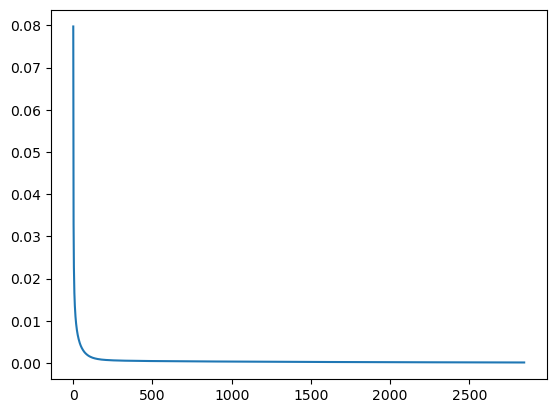

In [187]:
omega = 1.25
sor_max_iterations = 5000
x_sor, increments_sor = sor(A_3, b, omega, N=sor_max_iterations)
print("SOR Solution:", x_sor)
plt.plot(increments_sor)

## Convergence rate
For each of the methods (and several $\omega$ for SOR) calculate the <font color='red'>convergence factors</font> $$\rho_{k+1}:=\frac{\|\mathbf{x}_{k+1} - \mathbf{x}_{k}\|}{\|\mathbf{x}_{k} - \mathbf{x}_{k-1}\|}$$ and plot them for available $k$. Compare the limiting value of $\rho_k$ with the <font color='red'>spectral radius</font> of the respective matrix $B$.


Considering the fact, that we already have nominator part of the fraction formula of convergence factors (increments);
In order to get the denominator part of the fraction, we can use previous (k-th) increments, instead of (k+1-th)

In [178]:
# Jacobi B matrix

L = np.tril(A, k=-1)
U = np.triu(A, k=1)

D_inv = np.diag(1 / np.diag(A))
B_jacobi = -np.dot(D_inv, L + U)
B_jacobi_spectral_radius = np.max(np.abs(np.linalg.eigvals(B_jacobi)))
B_jacobi_spectral_radius

99.00000000000003

In [179]:
# GS B matrix

L = np.tril(A, k=-1)
U = np.triu(A, k=1)

D = np.diag(np.diag(A))
L = np.tril(A, k=-1)
U = np.triu(A, k=1)

D_L_inv = np.linalg.inv(D + L)
B_GS = -np.dot(D_L_inv, U)
B_GS_spectral_radius = np.max(np.abs(np.linalg.eigvals(B_GS)))
B_GS_spectral_radius

1.0000000000000042

In [183]:
# SOR B matrix
D = np.diag(np.diag(A))
L = np.tril(A, k=-1)
U = np.triu(A, k=1)

D_w_L_inv = np.linalg.inv(D + omega * L)
D_multiplier = 1 - omega
D_sub_omega_U = np.subtract(D_multiplier * D, omega * U)
B_sor = np.dot(D_w_L_inv, D_sub_omega_U)
B_sor_spectral_radius = np.max(np.abs(np.linalg.eigvals(B_sor)))
B_sor_spectral_radius

1.0000000000000087

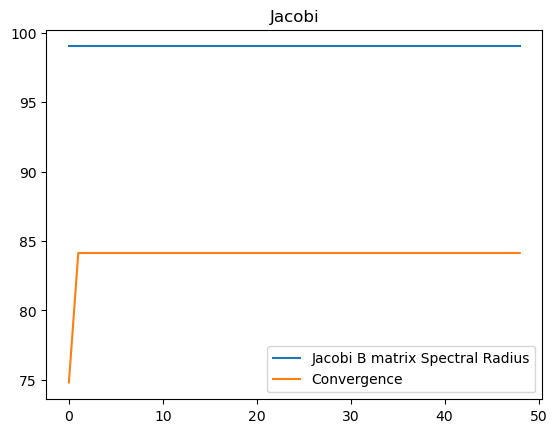

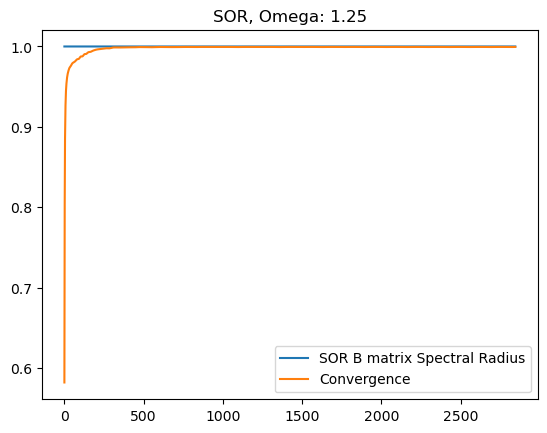

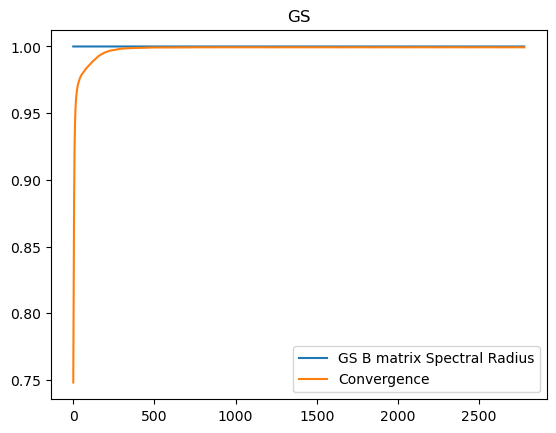

In [188]:
# your code here
convergence_jacobi = [nominator / denominator for nominator, denominator in zip(increments_jacobi[1:], increments_jacobi) if nominator]
plt.title("Jacobi")
plt.plot([B_jacobi_spectral_radius] * len(convergence_jacobi), label='Jacobi B matrix Spectral Radius')
plt.plot(convergence_jacobi, label='Convergence')
plt.legend()
plt.show()
convergence_sor = [nominator / denominator for nominator, denominator in zip(increments_sor[1:], increments_sor) if nominator]
plt.title(f"SOR, Omega: {omega}")
plt.plot([B_sor_spectral_radius] * len(convergence_sor), label=f'SOR B matrix Spectral Radius')
plt.plot(convergence_sor, label='Convergence')
plt.legend()
plt.show()
convergence_gs = [nominator / denominator for nominator, denominator in zip(increments_gs[1:], increments_gs) if nominator]
plt.title(f"GS")
plt.plot([B_GS_spectral_radius] * len(convergence_gs), label=f'GS B matrix Spectral Radius')
plt.plot(convergence_gs, label='Convergence')
plt.legend()
plt.show()

SOR Solution: [-0.00690778 -0.01541042 -0.02379309  0.009972    0.02056341  0.01463441
  0.02400452 -0.01934524  0.02870624 -0.02462838  0.00622181 -0.01271092
 -0.02923966  0.01754115  0.01346517 -0.01175841  0.01616938  0.00052122
 -0.01841395 -0.00569888 -0.02302256 -0.02128149  0.00352413 -0.00363197
 -0.01046318  0.01431689  0.01500223  0.02279215  0.02532926 -0.00158371
 -0.01960494 -0.03322299 -0.031256    0.00559938  0.02218243  0.00619266
 -0.0148073   0.02600113 -0.02395297  0.02624685  0.02777288  0.01657542
 -0.01020252  0.00816349  0.00781933  0.0291783  -0.02107527 -0.01615712
 -0.01407785 -0.00861721  0.00430934 -0.02899965 -0.0081809   0.00205773
  0.02080914 -0.01214011  0.01157357  0.0194364   0.02849582  0.02629701
  0.01968554 -0.01692837 -0.00262038 -0.00686855 -0.02107261  0.01179014
 -0.0105019   0.02220567 -0.02379367 -0.01360063 -0.01801809  0.00423041
  0.02767845 -0.00342289  0.02342685  0.01131462 -0.01927379 -0.00509928
  0.01749246  0.02997451 -0.00544979 

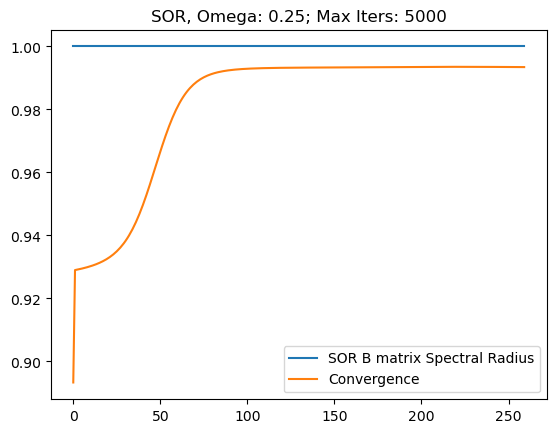

SOR Solution: [-0.007255   -0.01571006 -0.02404405  0.00977063  0.02041234  0.01453417
  0.02395544 -0.01934303  0.02875965 -0.02452402  0.00637666 -0.01250623
 -0.02898596  0.01784284  0.01381364 -0.01136453  0.01660712  0.00100111
 -0.01789378 -0.00514045 -0.02242802 -0.02065314  0.00418386 -0.00294339
 -0.00974841  0.0150551   0.01576106  0.02356867  0.0261205  -0.00078081
 -0.01879345 -0.03240605 -0.03043674  0.0064178   0.02299685  0.00699993
 -0.0140103   0.02678478 -0.02318573  0.0269947   0.02849842  0.01727583
 -0.00953     0.00880547  0.00842826  0.02975175 -0.02053957 -0.01566131
 -0.01362391 -0.00820698  0.00467421 -0.02868164 -0.00791103  0.00227832
  0.02097953 -0.01202066  0.01164157  0.01945261  0.02846013  0.0262095
  0.01954651 -0.01711841 -0.00286073 -0.00715829 -0.02141063  0.01140516
 -0.01093234  0.02173147 -0.02430977 -0.01415658 -0.01861168  0.00360154
  0.02701681 -0.00411466  0.02270772  0.01057103 -0.02003888 -0.00588279
  0.01669366  0.02916363 -0.0062695   

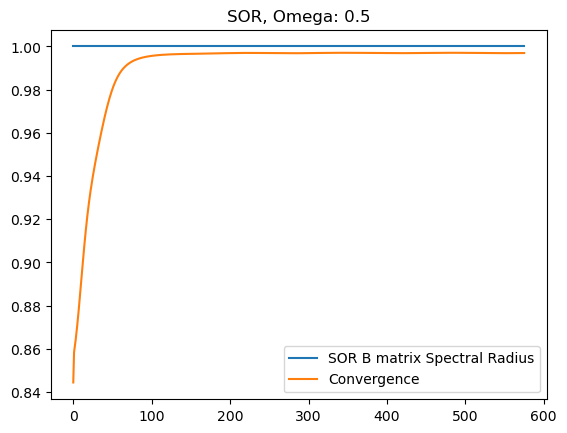

SOR Solution: [-0.00698108 -0.01549088 -0.02388046  0.00987802  0.02046314  0.0145282
  0.02389275 -0.01946216  0.02858459 -0.0247543   0.00609209 -0.01284393
 -0.02937545  0.01740312  0.01332544 -0.01189926  0.01602797  0.00037983
 -0.01855474 -0.00583849 -0.0231604  -0.02141698  0.00339156 -0.00376106
 -0.01058825  0.01419638  0.0148868   0.02268228  0.02522542 -0.00168108
 -0.01969542 -0.0333062  -0.03133159  0.00553174  0.022123    0.0061417
 -0.01484959  0.02596769 -0.02397745  0.02623142  0.02776656  0.01657821
 -0.01019066  0.00818435  0.00784909  0.02921679 -0.02102824 -0.01610177
 -0.01401444 -0.00854604  0.00438795 -0.02891396 -0.0080885   0.00215642
  0.0209137  -0.01203015  0.01168849  0.01955578  0.02861917  0.02642382
  0.01981529 -0.01679619 -0.0024863  -0.0067331  -0.02093632  0.01192676
 -0.01036548  0.02234138 -0.02365917 -0.01346783 -0.01788748  0.00435837
  0.02780329 -0.0033016   0.02354416  0.01142756 -0.01916562 -0.00499624
  0.01759001  0.03006625 -0.00536418  0

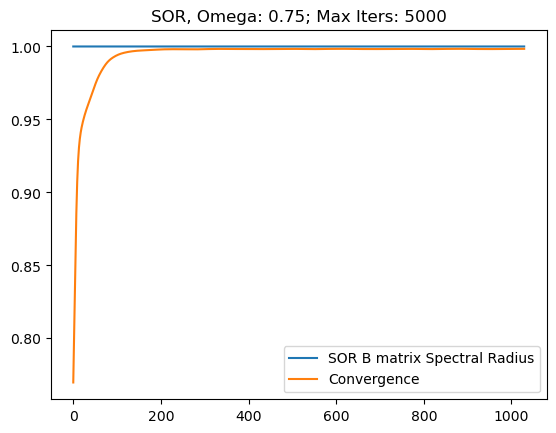

SOR Solution: [-0.00808642 -0.01657415 -0.02493743  0.00885147  0.01947101  0.01357437
  0.02298093 -0.02032841  0.02776728 -0.02551948  0.00538203 -0.01349611
 -0.0299672   0.01687411  0.01286124 -0.01229685  0.01569855  0.00011987
 -0.01874423 -0.00595675 -0.02320697 -0.02139167  0.00348866 -0.00359255
 -0.01034896  0.01450551  0.01526457  0.02312724  0.02573583 -0.0011072
 -0.01906031 -0.03261233 -0.03058166  0.0063348   0.02297606  0.00704143
 -0.01390671  0.02695004 -0.02295947  0.02728104  0.02884371  0.01767868
 -0.00907118  0.00931845  0.00899335  0.03036673 -0.01987712 -0.014954
 -0.01287453 -0.00741846  0.00549877 -0.02782428 -0.00702423  0.0031911
  0.02191471 -0.01106673  0.01261051  0.0204328   0.02944773  0.02720065
  0.02053735 -0.01613174 -0.00188207 -0.00619147 -0.02045939  0.01233709
 -0.01002334  0.02261399 -0.02345716 -0.0133372  -0.01782873  0.00434501
  0.02771789 -0.00345869  0.02331601  0.01112926 -0.01953289 -0.00543102
  0.01708944  0.02950186 -0.00599015  0.0

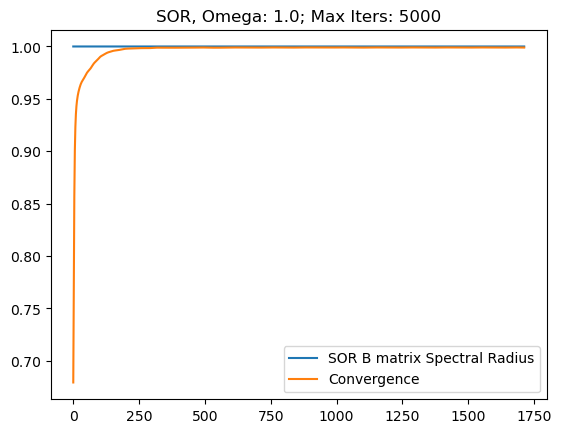

SOR Solution: [-7.39436461e-03 -1.59207982e-02 -2.43253127e-02  9.41997992e-03
  1.99937019e-02  1.40492088e-02  2.34060824e-02 -1.99546073e-02
  2.80882892e-02 -2.52525187e-02  5.59390334e-03 -1.33401547e-02
 -2.98677704e-02  1.69166153e-02  1.28466470e-02 -1.23684893e-02
  1.55701343e-02 -6.48332758e-05 -1.89845104e-02 -6.25169274e-03
 -2.35554337e-02 -2.17923164e-02  3.03738312e-03 -4.09270848e-03
 -1.08960723e-02  1.39135676e-02  1.46300981e-02  2.24526923e-02
  2.50238424e-02 -1.85387007e-03 -1.98387424e-02 -3.34194979e-02
 -3.14144140e-02  5.47971117e-03  2.21019887e-02  6.15178307e-03
 -1.48084352e-02  2.60397536e-02 -2.38747353e-02  2.63643877e-02
  2.79292665e-02  1.67700443e-02 -9.97044061e-03  8.43210600e-03
  8.12342131e-03  2.95166381e-02 -2.07040272e-02 -1.57544617e-02
 -1.36453770e-02 -8.15666147e-03  4.79613077e-03 -2.84885715e-02
 -7.64756158e-03  2.61119017e-03  2.13805166e-02 -1.15531007e-02
  1.21738853e-02  2.00476330e-02  2.91155457e-02  2.69227627e-02
  2.0314847

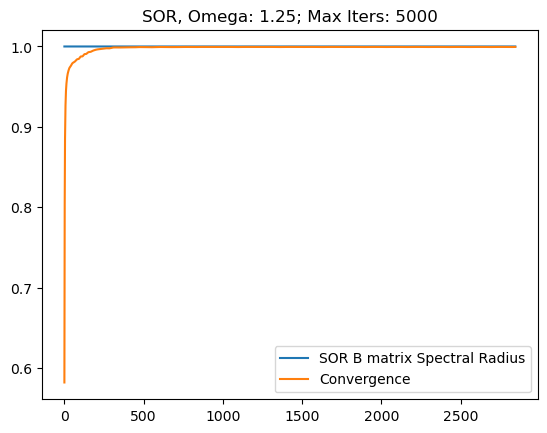

SOR: Convergence not achieved
SOR Solution: [-0.0069847  -0.01549785 -0.02389075  0.00986444  0.02044631  0.01450819
  0.02386963 -0.01948831  0.0285555  -0.02478621  0.00605749 -0.01288111
 -0.02941504  0.01736126  0.01328148 -0.01194515  0.01598033  0.00033064
 -0.0186053  -0.0058902  -0.02321306 -0.02147037  0.00333765 -0.00381528
 -0.01064254  0.01414222  0.01483299  0.02262905  0.02517298 -0.00173252
 -0.01974566 -0.03335503 -0.03137882  0.0054863   0.02207954  0.00610038
 -0.0148886   0.02593114 -0.02401139  0.02620021  0.02773819  0.01655281
 -0.010213    0.00816514  0.00783309  0.02920405 -0.02103767 -0.01610787
 -0.01401719 -0.00854543  0.0043919  -0.02890669 -0.00807794  0.00217022
  0.02093068 -0.01201006  0.01171159  0.01958182  0.02864803  0.02645538
  0.01984944 -0.0167596  -0.00244741 -0.00669205 -0.02089327  0.01197164
 -0.01031895  0.0223894  -0.02360985 -0.0134174  -0.01783612  0.00441045
  0.02785591 -0.00324865  0.02359726  0.0114806  -0.01911284 -0.00494392
  0.017

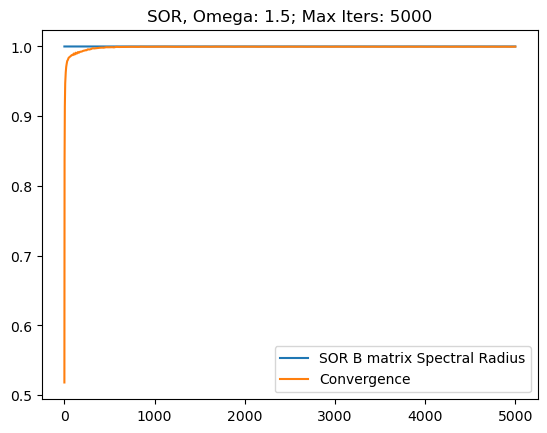

SOR: Convergence not achieved
SOR Solution: [-0.00611711 -0.01467403 -0.02311404  0.01059097  0.02111986  0.01512623
  0.02442992 -0.0189877   0.02899479 -0.0244096   0.00637037 -0.0126327
 -0.02923157  0.01747962  0.01333483 -0.01195643  0.01590507  0.00019229
 -0.0188056  -0.00615109 -0.02353295 -0.0218475   0.00290527 -0.00430076
 -0.01117883  0.01355757  0.01420255  0.0219555   0.02445912 -0.00248384
 -0.02053148 -0.03417237 -0.03222463  0.0046151   0.02118605  0.00518772
 -0.0158173   0.02498953 -0.02496277  0.02524217  0.02677662  0.01559079
 -0.01117238  0.00721148  0.00688819  0.02827095 -0.02195595 -0.01700833
 -0.01489685 -0.00940134  0.00356268 -0.02970632 -0.00884511  0.00143836
  0.0202369  -0.01266301  0.01110214  0.01901846  0.02813327  0.02599162
  0.01943895 -0.01711466 -0.00274505 -0.00693046 -0.02107081  0.01185638
 -0.01037073  0.02240205 -0.02353208 -0.0132741  -0.01762717  0.00468487
  0.0281953  -0.0028451   0.02406382  0.01200869 -0.01852501 -0.00429848
  0.0183

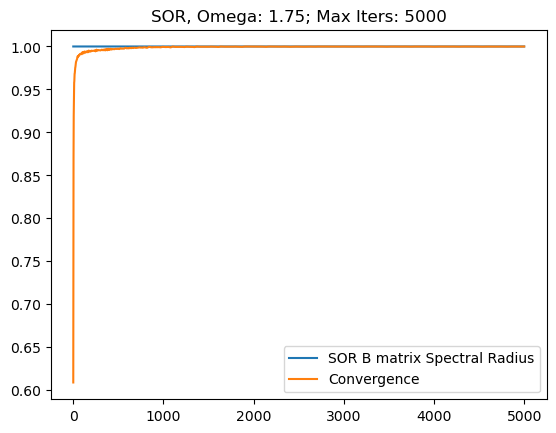

In [192]:
omega = 0.25
sor_max_iterations = 5000
x_sor, increments_sor = sor(A_3, b, omega, N=sor_max_iterations)
print("SOR Solution:", x_sor)
convergence_sor = [nominator / denominator for nominator, denominator in zip(increments_sor[1:], increments_sor) if nominator]
plt.title(f"SOR, Omega: {omega}; Max Iters: {sor_max_iterations}")
plt.plot([B_sor_spectral_radius] * len(convergence_sor), label=f'SOR B matrix Spectral Radius')
plt.plot(convergence_sor, label='Convergence')
plt.legend()
plt.show()
omega = 0.5
sor_max_iterations = 5000
x_sor, increments_sor = sor(A_3, b, omega, N=sor_max_iterations)
print("SOR Solution:", x_sor)
convergence_sor = [nominator / denominator for nominator, denominator in zip(increments_sor[1:], increments_sor) if nominator]
plt.title(f"SOR, Omega: {omega}")
plt.plot([B_sor_spectral_radius] * len(convergence_sor), label=f'SOR B matrix Spectral Radius')
plt.plot(convergence_sor, label='Convergence')
plt.legend()
plt.show()
omega = 0.75
sor_max_iterations = 5000
x_sor, increments_sor = sor(A_3, b, omega, N=sor_max_iterations)
print("SOR Solution:", x_sor)
convergence_sor = [nominator / denominator for nominator, denominator in zip(increments_sor[1:], increments_sor) if nominator]
plt.title(f"SOR, Omega: {omega}; Max Iters: {sor_max_iterations}")
plt.plot([B_sor_spectral_radius] * len(convergence_sor), label=f'SOR B matrix Spectral Radius')
plt.plot(convergence_sor, label='Convergence')
plt.legend()
plt.show()
omega = 1.0
sor_max_iterations = 5000
x_sor, increments_sor = sor(A_3, b, omega, N=sor_max_iterations)
print("SOR Solution:", x_sor)
convergence_sor = [nominator / denominator for nominator, denominator in zip(increments_sor[1:], increments_sor) if nominator]
plt.title(f"SOR, Omega: {omega}; Max Iters: {sor_max_iterations}")
plt.plot([B_sor_spectral_radius] * len(convergence_sor), label=f'SOR B matrix Spectral Radius')
plt.plot(convergence_sor, label='Convergence')
plt.legend()
plt.show()
omega = 1.25
sor_max_iterations = 5000
x_sor, increments_sor = sor(A_3, b, omega, N=sor_max_iterations)
print("SOR Solution:", x_sor)
convergence_sor = [nominator / denominator for nominator, denominator in zip(increments_sor[1:], increments_sor) if nominator]
plt.title(f"SOR, Omega: {omega}; Max Iters: {sor_max_iterations}")
plt.plot([B_sor_spectral_radius] * len(convergence_sor), label=f'SOR B matrix Spectral Radius')
plt.plot(convergence_sor, label='Convergence')
plt.legend()
plt.show()
omega = 1.5
sor_max_iterations = 5000
x_sor, increments_sor = sor(A_3, b, omega, N=sor_max_iterations)
print("SOR Solution:", x_sor)
convergence_sor = [nominator / denominator for nominator, denominator in zip(increments_sor[1:], increments_sor) if nominator]
plt.title(f"SOR, Omega: {omega}; Max Iters: {sor_max_iterations}")
plt.plot([B_sor_spectral_radius] * len(convergence_sor), label=f'SOR B matrix Spectral Radius')
plt.plot(convergence_sor, label='Convergence')
plt.legend()
plt.show()
omega = 1.75
sor_max_iterations = 5000
x_sor, increments_sor = sor(A_3, b, omega, N=sor_max_iterations)
print("SOR Solution:", x_sor)
convergence_sor = [nominator / denominator for nominator, denominator in zip(increments_sor[1:], increments_sor) if nominator]
plt.title(f"SOR, Omega: {omega}; Max Iters: {sor_max_iterations}")
plt.plot([B_sor_spectral_radius] * len(convergence_sor), label=f'SOR B matrix Spectral Radius')
plt.plot(convergence_sor, label='Convergence')
plt.legend()
plt.show()

# Conculsions **(0.5 pts)**

Summarize in several sentences what you achieved in this task, what were the main obstacles and how you overcome them. You can also add some suggestions how this task can be improved in the future




---
As you can see on the plots above, the task is too difficult for the Gauss method, as to solve such computationally extensive matrix without overflows. On the other hand the SOR method, and GS
shows as a very effective computationally, converging with fewer iterations algorithms.

As you can see from the analysis with different $\omega$ parameters $\omega \in {0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75}$ Disregarding the fact that with smaller $\omega = 0.25$ the method converges under 250 iterations,
it does not nescessary mean that we achieve wanted result, the thing is that our convergence criteria bases on difference of approximations, and with smaller omega method converges with larger error, as we can see, it does not
lie near the spectral radius, as methods with larger value does.
In this specific case, the best relaxation parameter is $\omega = 0.75$ as the method very quickly converges to reasonable accuracy within 1k iters. If on the other hand we seek precision, we can choose $\omega = 1.25$ as it
converges in over double of time comparing to previous setting, within 2.5k iterations.

In this lab we explored a wide variety of different linear solvers, and specifically how the work under the hood. Most interesting for me, was the analysis of the convergence with spectral radius, as the eigenvalues are useful as well here.
It helps to understand what different parameters and method achieve, without actually knowing the solution to given problem (we only needed to compare the plots, to say).

The Jacobi method however simple and with many extensions, lack numerical stability, making it hard to solve huge matrices, that probably is fixed with Jacobi-gradient (MJGI) method or others.

The SOR method on the other hand is very versatile, as you migh have observed hugely depends on $\omega$ parameter.

The Gauss-Seidel method being in a middle, not so versatile as SOR, however a very numerically stable solver, as the SOR, producing precise and meaningful results in reasonable time.

---